In [382]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Income Catagorization & Data Description

Determining the income for a specific individual is a difficult task for non-governmental entities. Income data is generally kept private, and even when shared it can be hard to verify. Being able to classify individuals into income groups based on more readily available indicators is imporant for many fields. Charities may need to target their efforts to those most likely to need their help in a lower income bracket, politicians may choose to target different messages to different income groups, and businesses obviously may want to advertise different products to groups with differing incomes. One means of creating such an indicator is using anonymized census data. While the census does not include how much a specific individual makes, we can use the "profiles" of a people that make a specific income to later predict if a person likely to be in a specific income catagory.

This is an analysis of the "Adult" data set from the UCI Machine Learning Repository. The data was pulled from 1994 census data for ages over 16 and less than 100 with the goal to predict if a person makes greater or less than $50,000/year in income. The data set consists of 48,842 total records that has been split into a training data set of 32,561 records and testing data set of 16,281 records. This is a classification problem using a mix of 13 catagorical and continuous variables to assign a person into a >$50/yr bucket or <$50k/year bucket.

Reference

Kohavi, R. and Becker, B. (1996). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml/datasets/Adult]. Irvine, CA: University of California, School of Information and Computer Science


In [383]:
adult_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
test_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

adult = pd.read_csv(r"C:\Users\mattt\Documents\Classes\Data Science\Project\Data Sets\Income\Adult from Kaggle\adult.csv")
#adult = pd.read_csv(r"C:\Users\mattt\Documents\Classes\Data Science\Project\Data Sets\Income\adult.data")
test = pd.read_csv(r"C:\Users\mattt\Documents\Classes\Data Science\Project\Data Sets\Income\adult_test.csv", skipinitialspace = True)

The dataset has 14 columns of which 6 are numerical and 8 are catagorical. Accoriding to the documentation, all the numerical columns are continous.

In [384]:
adult.info()
adult.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [385]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   |1x3 Cross validator  16281 non-null  int64 
 1   Unnamed: 1            16281 non-null  object
 2   Unnamed: 2            16281 non-null  int64 
 3   Unnamed: 3            16281 non-null  object
 4   Unnamed: 4            16281 non-null  int64 
 5   Unnamed: 5            16281 non-null  object
 6   Unnamed: 6            16281 non-null  object
 7   Unnamed: 7            16281 non-null  object
 8   Unnamed: 8            16281 non-null  object
 9   Unnamed: 9            16281 non-null  object
 10  Unnamed: 10           16281 non-null  int64 
 11  Unnamed: 11           16281 non-null  int64 
 12  Unnamed: 12           16281 non-null  int64 
 13  Unnamed: 13           16281 non-null  object
 14  Unnamed: 14           16281 non-null  object
dtypes: int64(6), object(9)
memory usage:

Column Headers From the Dataset:
1. **age**: continuous.
2. **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. **fnlwgt**: continuous.
4. **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. **education-num**: continuous.
6. **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
9. **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
10. **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
11. **sex**: Female, Male.
12. **capital-gain**: continuous.
13. **capital-loss**: continuous.
14. **hours-per-week**: continuous.
15. **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [386]:
adult.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
test.columns = [
    "Age", "WorkClass", "fnlwgt", "Education", "EducationNum",
    "MaritalStatus", "Occupation", "Relationship", "Race", "Gender",
    "CapitalGain", "CapitalLoss", "HoursPerWeek", "NativeCountry", "Income"
]
adult.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Race,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Data Cleaning

First check if there are NaN values in the data, and there are none.

In [387]:
print(adult.isnull().value_counts())


Age    WorkClass  fnlwgt  Education  EducationNum  MaritalStatus  Occupation  Relationship  Race   Gender  CapitalGain  CapitalLoss  HoursPerWeek  NativeCountry  Income
False  False      False   False      False         False          False       False         False  False   False        False        False         False          False     32561
dtype: int64


### Catagorical Columns 
WorkClass and Occupation have '?' entries on the same rows. These rows could be treated as a an "other" type bucket or be deleted. It is probably better to exclude them from the analysis without further information.

NativeCountry also has '?' values that should be excluded.

In [388]:
print(adult.WorkClass.unique())
print(adult.Education.unique())
print(adult.MaritalStatus.unique())
print(adult.Occupation.unique())
print(adult.Relationship.unique())
print(adult.Race.unique())
print(adult.Gender.unique())
print(adult.NativeCountry.unique())

['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']
['Female' 'Male']
['United-States' '?' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germ

In [389]:
adult = adult[adult['WorkClass'] != '?']
adult = adult[adult['Occupation'] != '?']
adult = adult[adult['NativeCountry'] != '?']
print(adult.WorkClass.unique())
print(adult.Occupation.unique())
print(adult.NativeCountry.unique())

test = test[test['WorkClass'] != '?']
test = test[test['Occupation'] != '?']
test = test[test['NativeCountry'] != '?']
print(test.WorkClass.unique())
print(test.Occupation.unique())
print(test.NativeCountry.unique())

['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Transport-moving' 'Sales' 'Craft-repair'
 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Handlers-cleaners'
 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines' 'Trinadad&Tobago' 'Canada' 'South' 'Holand-Netherlands'
 'Puerto-Rico' 'Poland' 'Iran' 'England' 'Germany' 'Italy' 'Japan' 'Hong'
 'Honduras' 'Cuba' 'Ireland' 'Cambodia' 'Peru' 'Nicaragua'
 'Dominican-Republic' 'Haiti' 'Hungary' 'Columbia' 'Guatemala'
 'El-Salvador' 'Jamaica' 'Ecuador' 'France' 'Yugoslavia' 'Portugal' 'Laos'
 'Thailand' 'Outlying-US(Guam-USVI-etc)' 'Scotland']
['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-re

### Continuous Columns
Check what the non-catagorical columns look like. 

* Age spans from 17-90 which aligns with the data extraction description.
* fnlwgt spans from 12285 - 1484705.
* EducationNum spans from 1-16, and appears to match the catagorical education column exactly.
* CapitalLoss and CapitalGain are 0 for > 75% of entries
* HoursPerWeek has a minimum of 1 and maximum of 99 with Q1-Q3 all at 40 hours, which makes sense and aligns with the data extraction description.

From the included documentation with the data set, the Final Weight catagory is:

Description of fnlwgt (final weight)
>
> The weights on the CPS files are controlled to independent estimates of the
> civilian noninstitutional population of the US.  These are prepared monthly
> for us by Population Division here at the Census Bureau.  We use 3 sets of
> controls.
>  These are:
>          1.  A single cell estimate of the population 16+ for each state.
>          2.  Controls for Hispanic Origin by age and sex.
>          3.  Controls by Race, age and sex.
>
> We use all three sets of controls in our weighting program and "rake" through
> them 6 times so that by the end we come back to all the controls we used.
>
> The term estimate refers to population totals derived from CPS by creating
> "weighted tallies" of any specified socio-economic characteristics of the
> population.
>
> People with similar demographic characteristics should have
> similar weights.  There is one important caveat to remember
> about this statement.  That is that since the CPS sample is
> actually a collection of 51 state samples, each with its own
> probability of selection, the statement only applies within
> state.

Since this column only describes the number of total people similar to the row, it likely does not need to be included in the analysis of if a person makes more or less than $50k/year.


In [390]:
adult.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
EducationNum,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
CapitalGain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
CapitalLoss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
HoursPerWeek,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


In [391]:
adult = adult.drop('fnlwgt',axis=1)
test = test.drop('fnlwgt',axis=1)

## Initial Data Analysis

* Only ~25% of entries in the data set make over $50k/year.

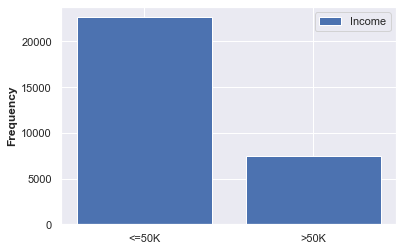

0.24892248524633645


In [392]:
plt.locator_params(axis='y', integer=True)
plt.ylabel('Frequency', fontweight='bold')

labels, counts = np.unique(adult['Income'], return_counts=True)
plt.bar(labels, counts,label='Income')
plt.legend(loc="upper right")
plt.show()
print(counts[1]/(counts[0]+counts[1]))

* Age is somewhat normally distributed with a right skew.

* 40 hours is by far the most common # of hours worked. Will need to see if that may align with salaried work and make comparisons with >40 hours worked less meaningful. Might be better to split into a full-time / part-time variable.

* Capital Gains and Losses are very uncommon. These also might be more useful as a combined catagorical variable to indicate if a person has capital gains/losses at all since these people likely have discretionary income.



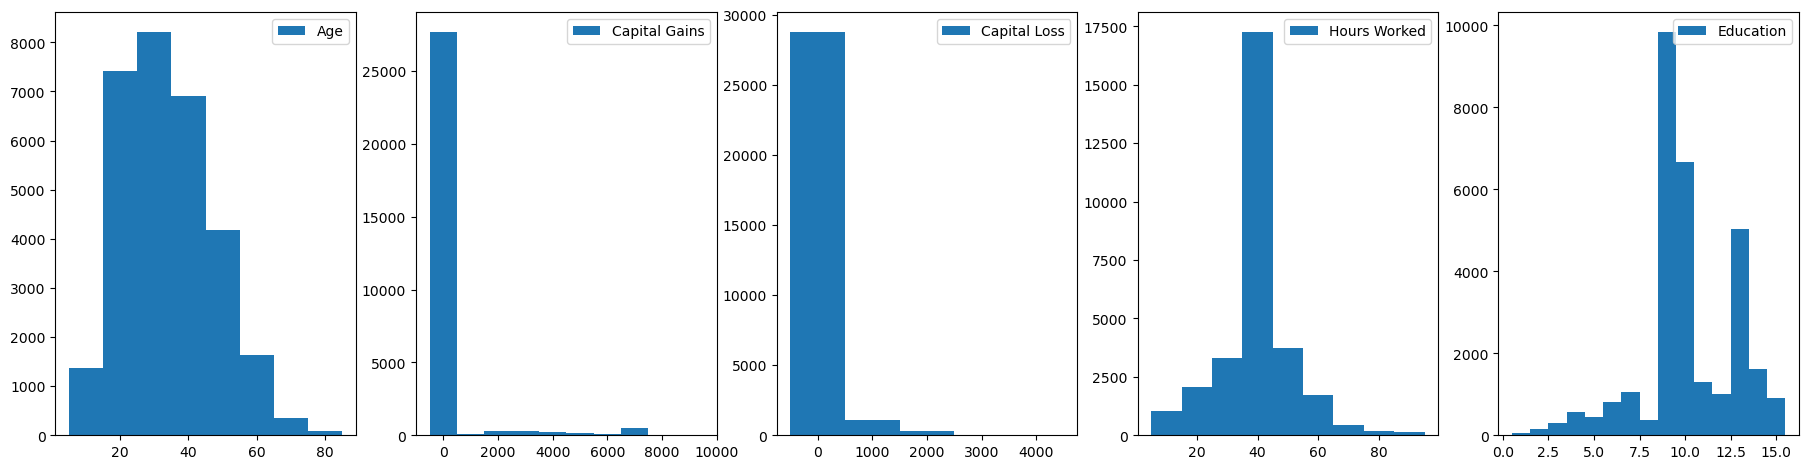

In [393]:
plt.style.use('default')
adult_nums =adult.select_dtypes(exclude=['object'])
w,l = 1,5
fig, ax = plt.subplots(w, l)
fig.set_size_inches(22.5, 5.5)
i = 0


ax[0].hist(adult['Age'], bins = [10,20,30,40,50,60,70,80,90],align='left',label='Age')
ax[0].legend(loc="upper right")

# ax[1].hist(adult['EducationNum'], bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],align='left',label='Education')
# ax[1].legend(loc="upper right")

ax[1].hist(adult['CapitalGain'], bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],align='left',label='Capital Gains')
ax[1].legend(loc="upper right")

ax[2].hist(adult['CapitalLoss'], bins = [0,1000,2000,3000,4000,5000],align='left',label='Capital Loss')
ax[2].legend(loc="upper right")

ax[3].hist(adult['HoursPerWeek'], bins = [10,20,30,40,50,60,70,80,90,100],align='left',label='Hours Worked')
ax[3].legend(loc="upper right")

ax[4].hist(adult['EducationNum'], bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],align='left',label='Education')
ax[4].legend(loc="upper right")
# for column in adult_nums:
#         ax[i].hist(column,bins='auto', align='left')
#         i += 1
plt.show()

* Income >50k is positively correlated with Age, Education, Capital Gains (and Loss), and Hours Per Week with the Education having the strongest correlation. 

* Age is slightly positively correlated with Hours Per Week

* Education is slightly positively correlated with Hours Per Week and Capital Gains

* Income >50k has the highest correlatin with a combined flag of if a person has any capital gains or losses compared to continuous values or a single flag on capital gains.

<AxesSubplot:>

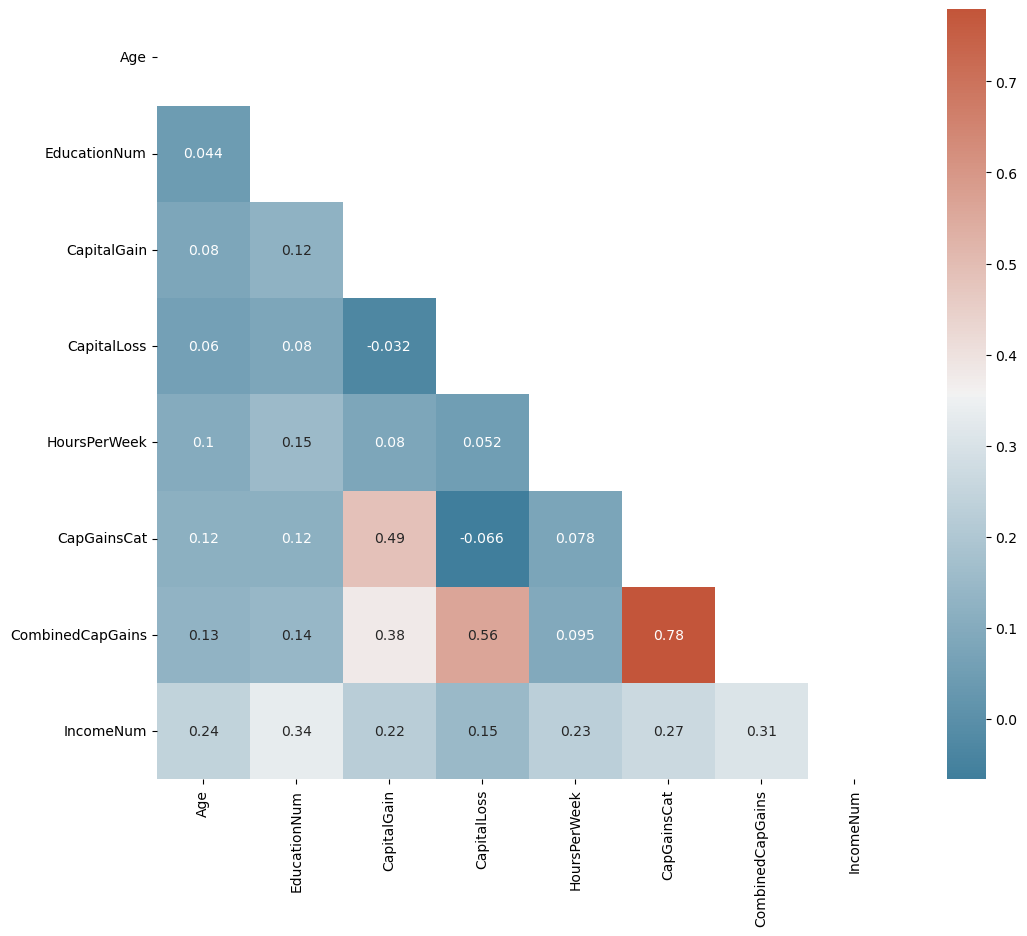

In [394]:
incomeDummy = pd.get_dummies(adult['Income'],drop_first=True)
#adult['CapGainsCat'] = adult['CapitalGain']
#adult['CapGainsCat'][adult['CapGainsCat'] > 0] = 1
#adult['CapGainsCat'][adult['CapGainsCat'] <= 0] = 0
adult['CapGainsCat'] = np.select([(adult['CapitalGain'] > 0),(adult['CapitalGain'] <= 0)],[1,0]) 
#adult['CombinedCapGains'] = adult['CapitalGain']
#adult['CombinedCapGains'][(adult['CapGainsCat'] != 0) | (adult['CapitalLoss'] != 0)] = 1
#adult['CapGainsCat'][(adult['CapGainsCat'] == 0) & (adult['CapitalLoss'] == 0)] = 0
adult['CombinedCapGains'] = np.select([(adult['CapitalGain'] != 0) | (adult['CapitalLoss'] != 0),(adult['CapitalGain'] == 0) & (adult['CapitalLoss'] == 0)],[1,0])
adult['IncomeNum'] = incomeDummy

testincomeDummy = pd.get_dummies(test['Income'],drop_first=True)
test['IncomeNum'] = testincomeDummy
test['CapGainsCat'] = np.select([(test['CapitalGain'] > 0),(test['CapitalGain'] <= 0)],[1,0]) 
test['CombinedCapGains'] = np.select([(test['CapitalGain'] != 0) | (test['CapitalLoss'] != 0),(test['CapitalGain'] == 0) & (test['CapitalLoss'] == 0)],[1,0])

corr = adult.corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, n=256) #as_cmap=True
sns.heatmap(corr,mask=mask,annot=True,cmap=cmap)


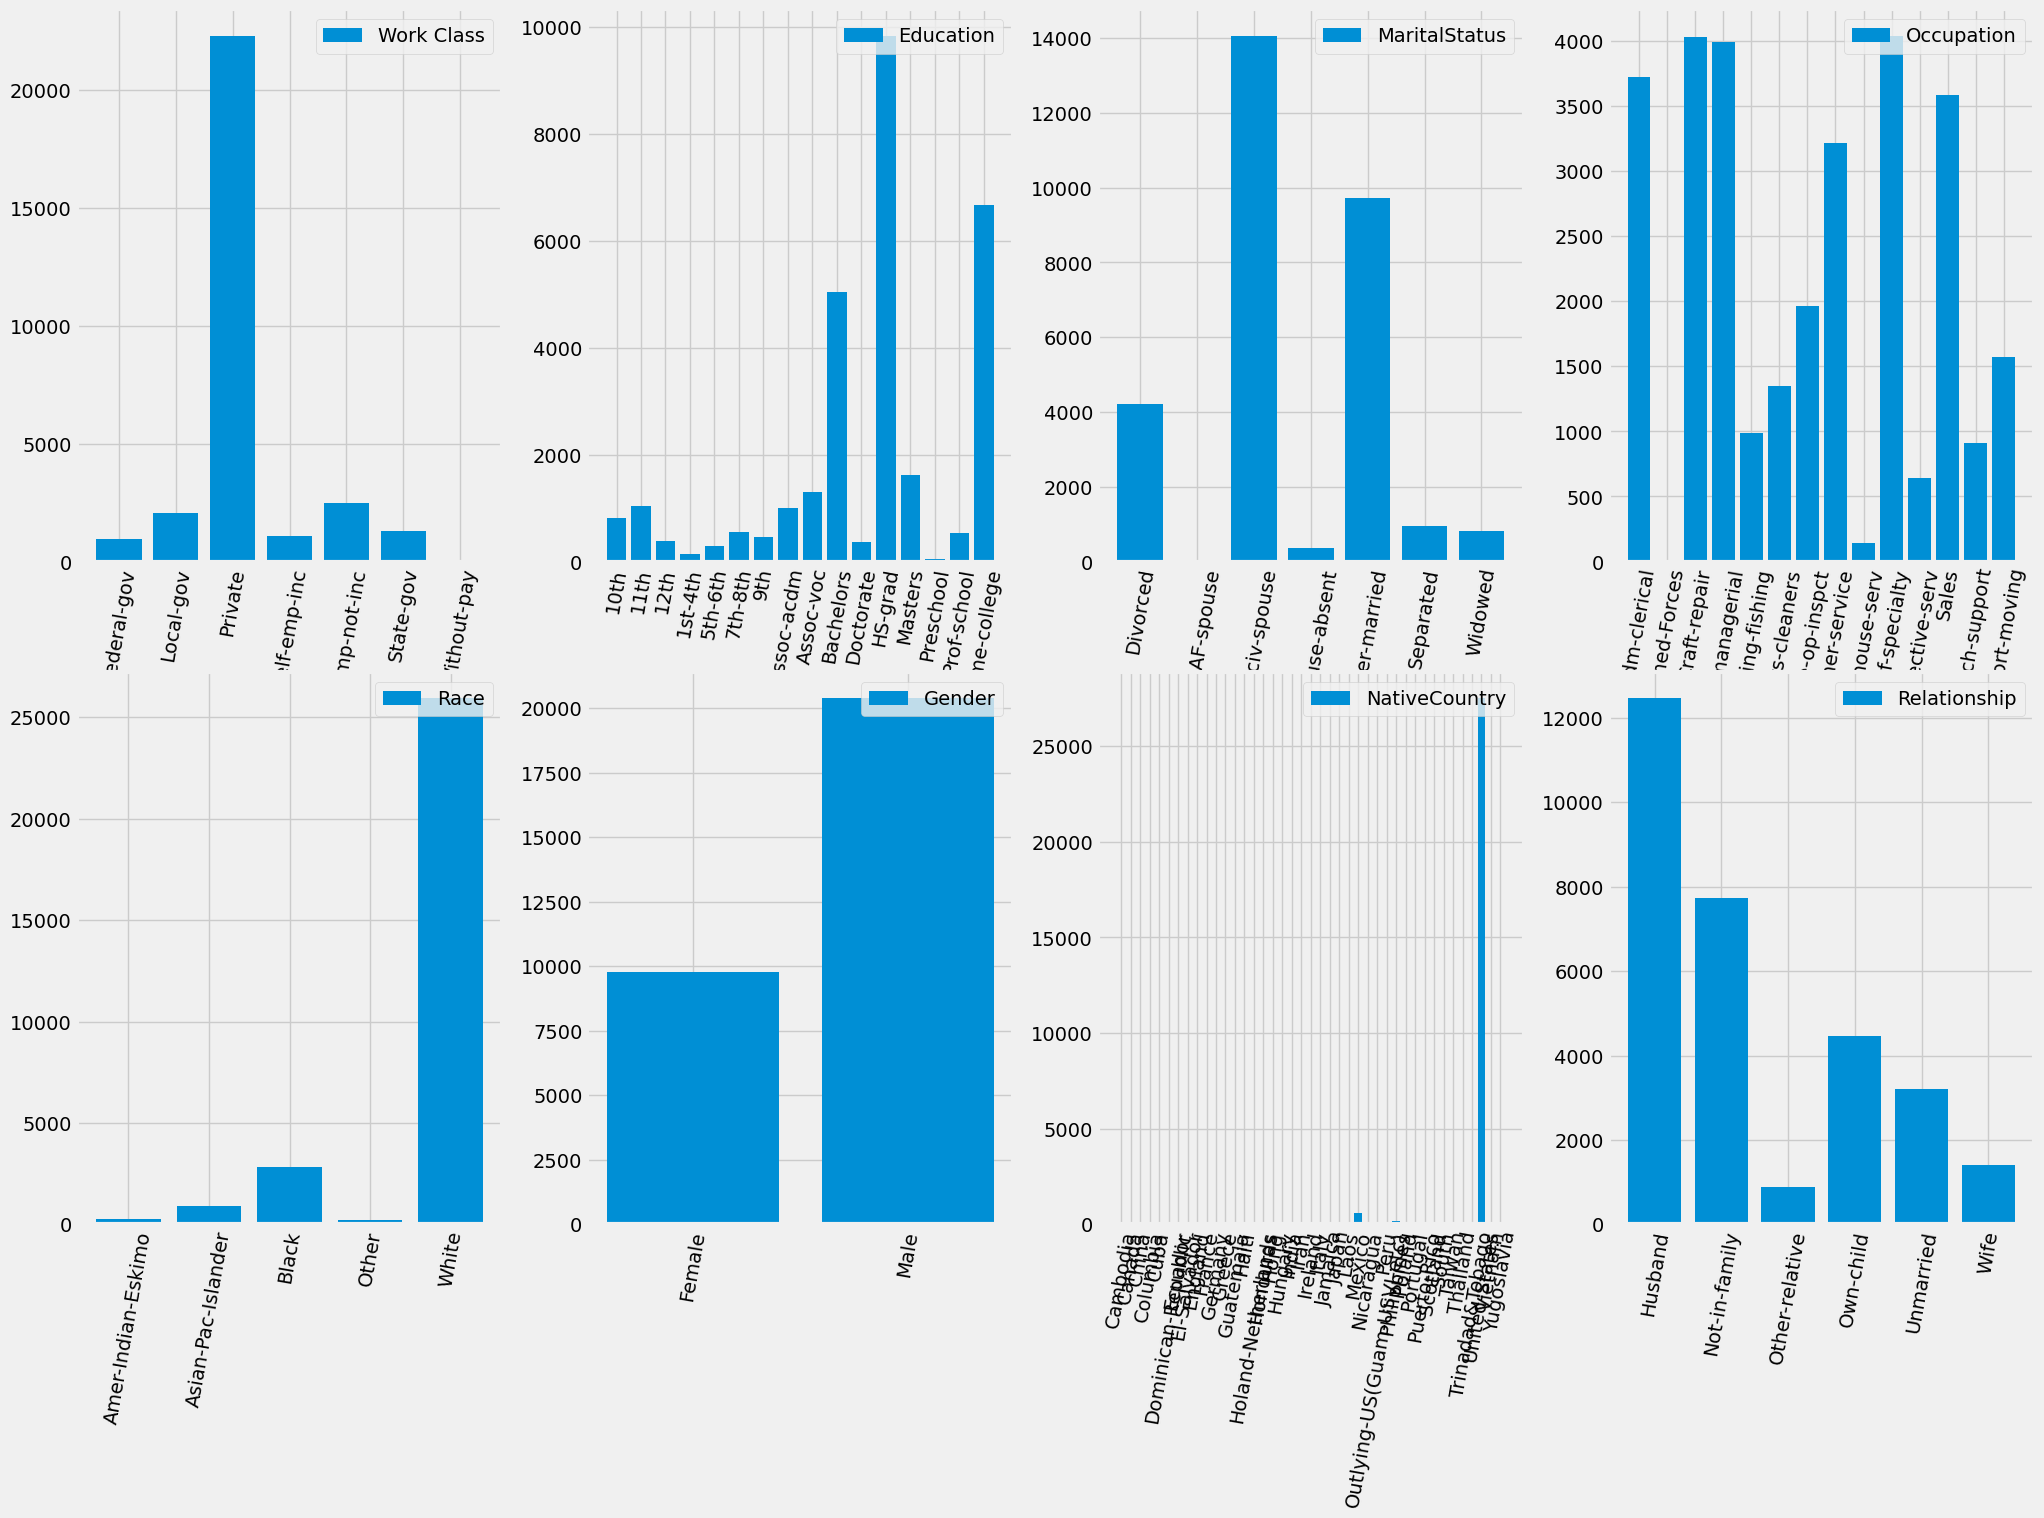

In [395]:
plt.style.use('fivethirtyeight')
adult_cat =adult.select_dtypes(exclude=['int64'])
#plt.figure(figsize=(20,10)) #nrows=2,ncols=4,

#plt.style.use('default')
#adult_nums =adult.select_dtypes(exclude=['object'])
w,l = 2,4
fig, ax = plt.subplots(w, l)
fig.set_size_inches(22.5, 15)
fig.subplots_adjust(hspace=.2)

labels1, counts1 = np.unique(adult['WorkClass'], return_counts=True)
ax[0,0].bar(labels1, counts1, label='Work Class')
#ax[0,0].hist(adult['WorkClass'], align='left',label='Work Class')
ax[0,0].legend(loc="upper right")
ax[0,0].tick_params(axis='x', labelrotation = 80)

labels2, counts2 = np.unique(adult['Education'], return_counts=True)
ax[0,1].bar(labels2, counts2, label='Education')
#ax[0,1].hist(adult['Education'], align='left',label='Education')
ax[0,1].legend(loc="upper right")
ax[0,1].tick_params(axis='x', labelrotation = 80)

labels3, counts3 = np.unique(adult['MaritalStatus'], return_counts=True)
ax[0,2].bar(labels3, counts3, label='MaritalStatus')
#ax[0,2].hist(adult['MaritalStatus'],align='left',label='Marital Status')
ax[0,2].legend(loc="upper right")
ax[0,2].tick_params(axis='x', labelrotation = 80)

labels4, counts4 = np.unique(adult['Occupation'], return_counts=True)
ax[0,3].bar(labels4, counts4, label='Occupation')
#ax[0,3].hist(adult['Occupation'],align='left',label='Occupation')
ax[0,3].legend(loc="upper right")
ax[0,3].tick_params(axis='x', labelrotation = 80)

labels5, counts5 = np.unique(adult['Race'], return_counts=True)
ax[1,0].bar(labels5, counts5, label='Race')
#ax[1,0].hist(adult['Race'],align='left',label='Race')
ax[1,0].legend(loc="upper right")
ax[1,0].tick_params(axis='x', labelrotation = 80)

labels6, counts6 = np.unique(adult['Gender'], return_counts=True)
ax[1,1].bar(labels6, counts6, label='Gender')
#ax[1,1].hist(adult['Gender'],align='left',label='Gender')
ax[1,1].legend(loc="upper right")
ax[1,1].tick_params(axis='x', labelrotation = 80)

labels7, counts7 = np.unique(adult['NativeCountry'], return_counts=True)
ax[1,2].bar(labels7, counts7, label='NativeCountry')
#ax[1,2].hist(adult['NativeCountry'],align='left',label='Native Country')
ax[1,2].legend(loc="upper right")
ax[1,2].tick_params(axis='x', labelrotation = 80)

labels8, counts8 = np.unique(adult['Relationship'], return_counts=True)
ax[1,3].bar(labels8, counts8, label='Relationship')
#ax[1,3].hist(adult['Relationship'],align='left',label='Relationship Status')
ax[1,3].legend(loc="upper right")
ax[1,3].tick_params(axis='x', labelrotation = 80)


# for column in adult_cat:
#         plt.figure(figsize=(10,4))
#         plt.hist(adult_cat[column])
#         plt.xticks(rotation=70)

* There is significant variation in the % of people making >$50k/yr, with Self-Employed having >50% versus the averge of 25%

[0.21879207 0.26896013 0.38706257 0.28571429 0.55865922 0.2946299
 0.        ]


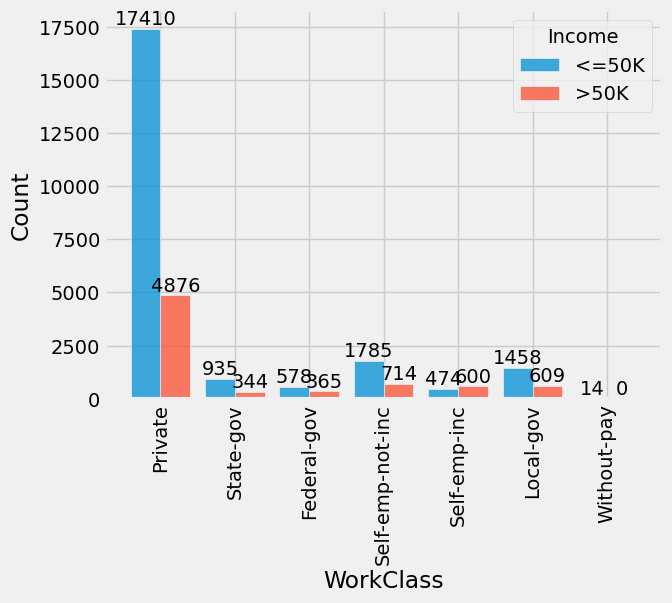

In [396]:
ax = sns.histplot(data=adult,x='WorkClass',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

* Men make >$50k/yr at a significantly higher rate than women

[0.11367818 0.3138371 ]


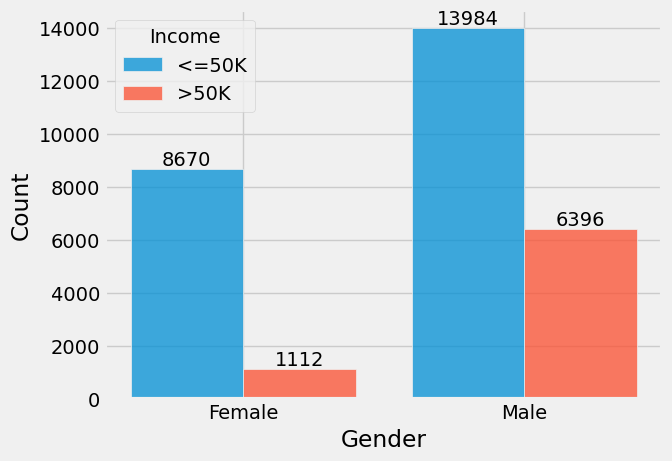

In [397]:
ax = sns.histplot(data=adult,x='Gender',hue='Income',multiple="dodge",shrink=0.8)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

* White and AAPI persons have significantly higher rates of earning >$50k/yr

[0.26371804 0.12992545 0.27709497 0.09090909 0.11888112]


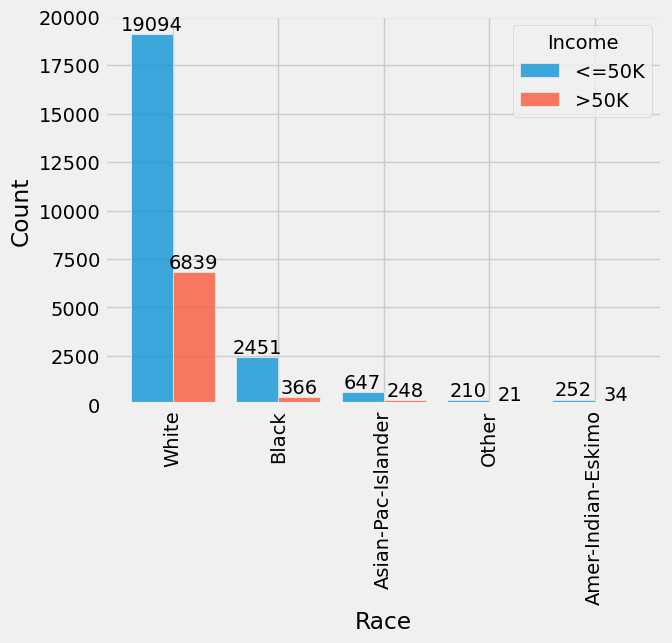

In [398]:
ax = sns.histplot(data=adult,x='Race',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

* As you would expect, there is stark difference in incomes across various occuptions with Executive-Managerial having the highest rate >$50k/yr
* There is likely some crossover between work class and occupation, but work class is more broken along public sector / private sector than type of job.

[0.48522044 0.12461851 0.44848935 0.04109589 0.13383499 0.20292621
 0.27064732 0.22531017 0.11627907 0.30482456 0.32608696 0.06148148
 0.11111111 0.00699301]


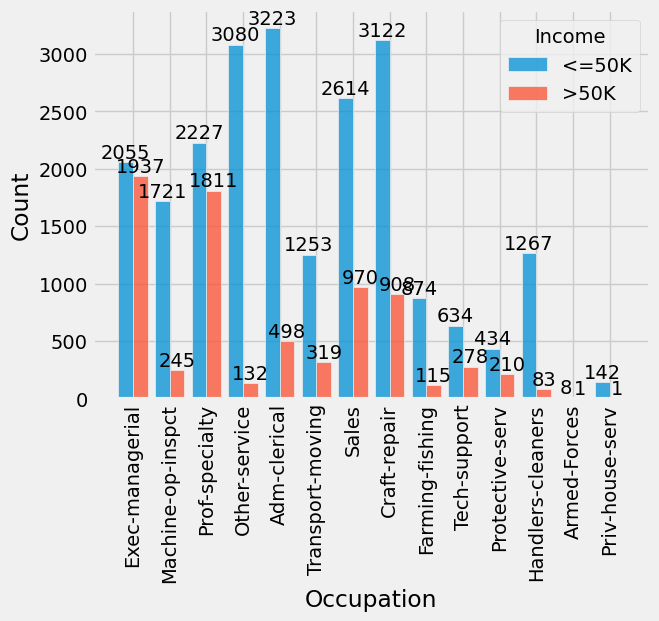

In [399]:
ax = sns.histplot(data=adult,x='Occupation',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

* The "MaritalStatus" and "Relationship" catagories appear to have significant overlap. Based on the rates of income >$50k/yr, it is probably simple and most effective to create a new catagorical variable that is 1 for currently married and together and 0 for everything else

In [400]:
relationships = adult[adult.MaritalStatus == 'Divorced']
relationships.count()
relationships['Relationship'].value_counts()

Not-in-family     2268
Unmarried         1535
Own-child          308
Other-relative     103
Name: Relationship, dtype: int64

[0.09673519 0.10726151 0.07028754 0.04832408 0.45495912 0.08378378
 0.47619048]


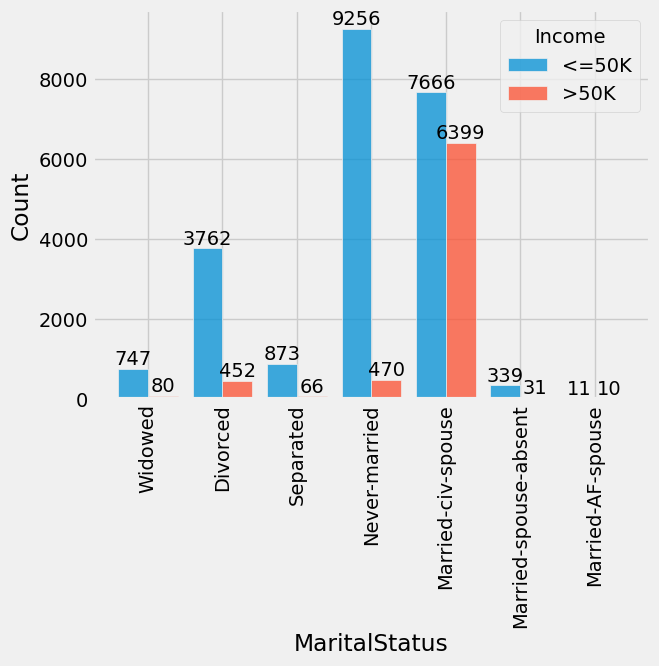

In [401]:
ax = sns.histplot(data=adult,x='MaritalStatus',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

[0.10652343 0.06631382 0.0143305  0.03937008 0.45566878 0.49359886]


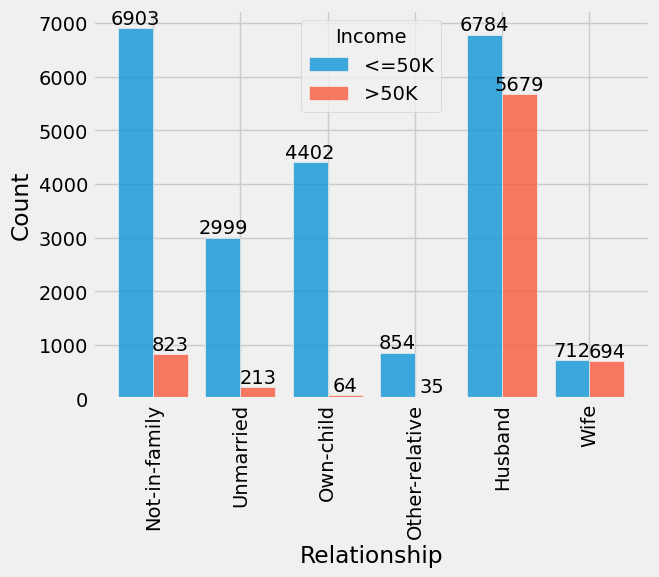

In [402]:
ax = sns.histplot(data=adult,x='Relationship',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

In [403]:
def married(row):
    if row['MaritalStatus'] == 'Married-civ-spouse' or row['MaritalStatus'] == 'Married-AF-spouse':
        return 1
    else:
        return 0

adult['RelationshipNum'] = adult.apply(lambda x: married(x),axis=1)
adult['RelationshipNum'].value_counts()

test['RelationshipNum'] = test.apply(lambda x: married(x),axis=1)
test['RelationshipNum'].value_counts()

0    8059
1    7001
Name: RelationshipNum, dtype: int64

* It appears that there is more variation in country of origin (with some having very high incomes and some very low) than by breaking the data into a native and non-native catagory.

[0.25432664 0.05409836 0.27586207 0.078125   0.29411765 0.45238095
 0.4        0.31914894 0.11111111 0.3364486  0.1971831  0.
 0.11009174 0.19642857 0.42857143 0.34883721 0.34375    0.35294118
 0.38983051 0.31578947 0.08333333 0.27173913 0.20833333 0.38888889
 0.06666667 0.06060606 0.02985075 0.0952381  0.23076923 0.03571429
 0.04761905 0.09       0.125      0.14814815 0.44444444 0.375
 0.11764706 0.11764706 0.17647059 0.         0.18181818]


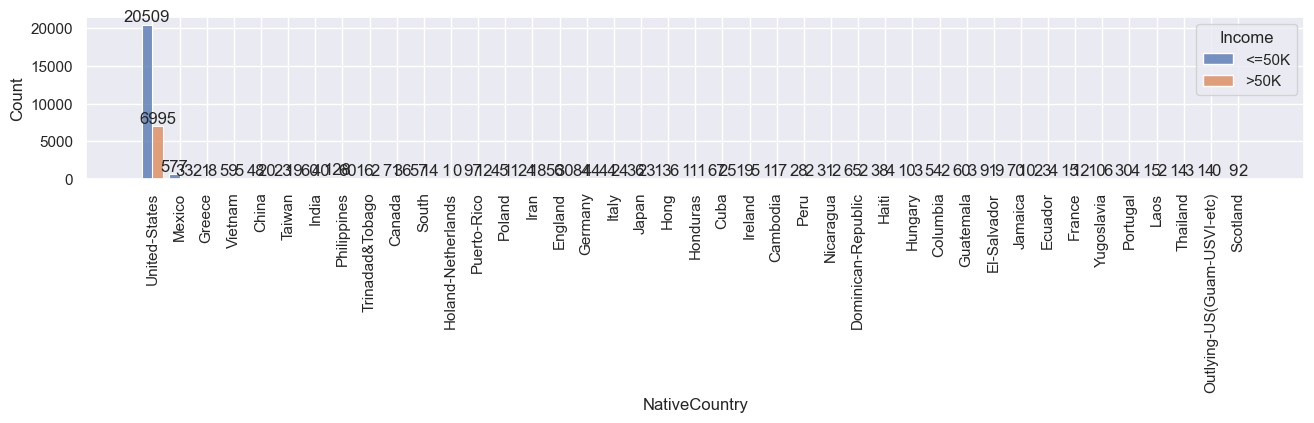

In [444]:

labels = []
ax = sns.histplot(data=adult,x='NativeCountry',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
    labels.append(i)
country_incomes = ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues)
sns.set(rc={"figure.figsize":(14, 2)})
print(country_incomes)
#plt.bar(country_incomes, x='NativeCountry',hue='% >$50k',multiple="dodge",shrink=0.8)
#ax.set(xlabel="Predicted",ylabel='Actual')

In [405]:
def native(row):
    if row['NativeCountry'] == 'United-States':
        return 1
    else:
        return 0

adult['usNative'] = adult.apply(lambda x: native(x),axis=1)
print(adult['usNative'].value_counts())

test['usNative'] = test.apply(lambda x: native(x),axis=1)
print(test['usNative'].value_counts())

1    27504
0     2658
Name: usNative, dtype: int64
1    13788
0     1272
Name: usNative, dtype: int64


[0.19300226        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.25432664]


C:\Users\mattt\AppData\Local\Temp\ipykernel_30236\522190739.py:5: RuntimeWarning: invalid value encountered in true_divide
  print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))


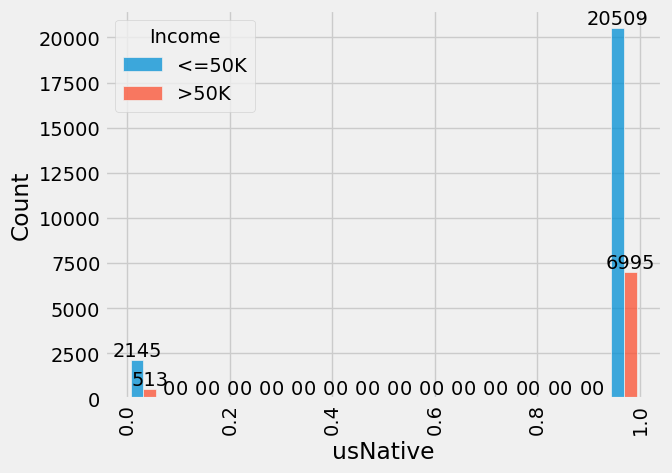

In [406]:
ax = sns.histplot(data=adult,x='usNative',hue='Income',multiple="dodge",shrink=0.8)
ax.tick_params(axis='x', labelrotation = 90)
for i in ax.containers:
    ax.bar_label(i,)
print(ax.containers[0].datavalues / ((ax.containers[0].datavalues) +ax.containers[1].datavalues))

### EDA Conclusions

It appears that the following catagories are likely to be predictive for income being greater or less than $50k/yr:

* Age
* Education
* Capital Gains/Loss Flag
* Gender
* Work Class
* Occupation
* Marital Status (simplified)
* Native Country


## Model Selection & Implementation

Since this will be a binary classification, logistic regression will be a reasonable choice to perform the analysis. It is possible we may run into an issue of correlation between data in Work Class and Occupation, but this should not be a significant issue for logistic regression.

Additionally, we wil run a k-nearest neighbor classificaiton. The data will need be standardized to give equal weight to differently scaled. The size of the data set and the nubmer of catagories cause issues with the speed of the analysis.

### Logistic Regression

In [408]:
import statsmodels.api as sm 
from sklearn import linear_model,metrics,neighbors
import patsy

All variables in the model are highly significant, with the excepetion of a few catagories of Race, Occupation and WorkClass. These all have a very low number of entries.

* Race       -   231 entries - Other         : p = 0.946
* Occupation -   9 entries  - Armed-Forces   : p = 0.446
* WorkClass  -   14 entries - Without-pay    : p = 1

Since these are just a portion of catagorical variables, need to check if the model performs better or worse without the entire variable.

In [436]:
logistic_string1 = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + WorkClass + usNative"
ytrain,Xtrain = patsy.dmatrices(logistic_string1, data=adult)
log_model = sm.Logit(endog=ytrain,exog=Xtrain).fit(maxiter=100)
print(log_model.summary())

         Current function value: 0.383403
         Iterations: 300
                           Logit Regression Results                           
Dep. Variable:              IncomeNum   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30133
Method:                           MLE   Df Model:                           28
Date:                Mon, 12 Dec 2022   Pseudo R-squ.:                  0.3168
Time:                        17:18:21   Log-Likelihood:                -11564.
converged:                      False   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Gender[Female]                     -5.9611      0.256    -23.245      0.000      -6.464      -5.458
G

c:\Users\mattt\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


* A model with all variables maximizes the test score and AUC.

In [432]:


lr = sklearn.linear_model.LogisticRegression(max_iter=1000)
logistic_string1 = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + WorkClass + usNative"
logistic_string2 = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum +  WorkClass + usNative"
logistic_string3 = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + usNative"
logistic_string4 = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + usNative"
# logistic_string1 = "IncomeNum ~  0 + Age + C(Gender,[[0],[1]]) + C(Race,[[0],[1],[2],[3],[4]]) + HoursPerWeek + RelationshipNum + Occupation + WorkClass + usNative"
# logistic_string2 = "IncomeNum ~  0 + Age + C(Gender,[[0],[1]]) + C(Race,[[0],[1],[2],[3],[4]]) + HoursPerWeek + RelationshipNum + Occupation + usNative"
# logistic_string3 = "IncomeNum ~  0 + Age + C(Gender,[[0],[1]]) + C(Race,[[0],[1],[2],[3],[4]]) + HoursPerWeek + RelationshipNum +  WorkClass + usNative"
# logistic_string4 = "IncomeNum ~  0 + Age + C(Gender,[[0],[1]]) + C(Race,[[0],[1],[2],[3],[4]]) + HoursPerWeek + RelationshipNum +  usNative"
strings = [logistic_string1,logistic_string2,logistic_string3,logistic_string4]
for string in strings:
    ytrain,Xtrain = patsy.dmatrices(string, data=adult)
    ytest,Xtest = patsy.dmatrices(string, data=test)
    adult_mod = lr.fit(Xtrain, ytrain.ravel())
    adult_hat = adult_mod.predict(Xtest)
    adult_probs = adult_mod.predict_proba(Xtest)
    print("Results for",string)
    print('Training Score:', adult_mod.score(Xtrain,ytrain.ravel()))
    print('Test Score is', adult_mod.score(Xtest,ytest.ravel()))
    print('Test AUC:',metrics.roc_auc_score(y_true=ytest,y_score=adult_probs[:,1]))
    print('---------------------------------------------')



Results for IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + WorkClass + usNative
Training Score: 0.8181155095815927
Test Score is 0.8161354581673307
Test AUC: 0.8652898386943282
---------------------------------------------
Results for IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum +  WorkClass + usNative
Training Score: 0.7773688747430542
Test Score is 0.7781540504648075
Test AUC: 0.8261114983821849
---------------------------------------------
Results for IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + usNative
Training Score: 0.8158941714740402
Test Score is 0.8132802124833998
Test AUC: 0.8633478421202894
---------------------------------------------
Results for IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + usNative
Training Score: 0.7678535906107022
Test Score is 0.7664674634794156
Test AUC: 0.8192772292539018
---------------------------------------------


Training Score is 0.8177839665804655
Test Score is 0.8156042496679947
Test AUC: 0.865381554529882
---------------------------------------------
              precision    recall  f1-score   support

      <=$50k       0.86      0.91      0.88     11360
       >$50k       0.65      0.53      0.59      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.72      0.73     15060
weighted avg       0.81      0.82      0.81     15060



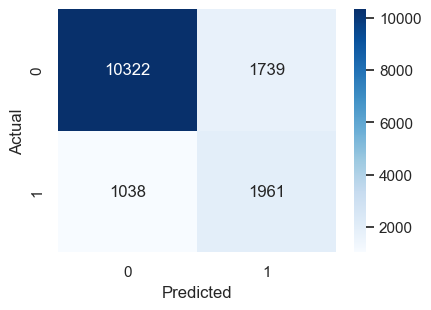

In [411]:
# Model with all variables used outperforms removing either Occupation or WorkClass

ytrain,Xtrain = patsy.dmatrices(logistic_string1, data=adult)
ytest,Xtest = patsy.dmatrices(logistic_string1, data=test)
adult_mod = lr.fit(Xtrain, ytrain.ravel())
adult_hat = adult_mod.predict(Xtest)
adult_probs = adult_mod.predict_proba(Xtest)
acc_log = adult_mod.score(Xtest,ytest.ravel())
print('Training Score is', adult_mod.score(Xtrain,ytrain.ravel()))
print('Test Score is', adult_mod.score(Xtest,ytest.ravel()))
print('Test AUC:',metrics.roc_auc_score(y_true=ytest,y_score=adult_probs[:,1]))
print('---------------------------------------------')

confuse =  sklearn.metrics.confusion_matrix(adult_hat,ytest.ravel())
report = sklearn.metrics.classification_report(ytest.ravel(),adult_hat,target_names=['<=$50k','>$50k'])
sns.set(rc={"figure.figsize":(4, 3)})
ax = sns.heatmap(confuse, annot=True, cmap='Blues',fmt='d',)
ax.set(xlabel="Predicted",ylabel='Actual')
print(report)

#compute false positive and true positive rates for ROC plot
log_fpr,log_tpr, log_thresholds = metrics.roc_curve(y_true=ytest,y_score=adult_probs[:,1])
auc_log = metrics.roc_auc_score(y_true=ytest,y_score=adult_probs[:,1])


### K-Nearest Neighbors

In order to perform a k-nearest neighbors classication, it is necissary to standardize continous varaibles. Because KNN relies on the "distance" between observations, changes in scale between variables can cause effects to be magnified or ignored. A value of in grams would dominate another variable in kilograms even if the materials were in similar quanities.

In the adult data set, there are only a handful of continous varaibles that are used in the final analysis - Age and HoursPerWeek. They are actually not widly out of scale with one another, but it will be useful to standardize them since the analysis is mixing catagorical and continous varaibles.

In [445]:
#Split catagorical variables into a column per catagory and standardize continous variables

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize

#Need to use both data sets to standardize values
#This is probably not a very efficient way to do it

adult['Test'] = 0
test['Test'] = 1

combined = pd.concat([adult[['Age','HoursPerWeek','Test']],test[['Age','HoursPerWeek','Test']]])
scaler = StandardScaler()
norm = pd.DataFrame(scaler.fit_transform(combined),columns=['Age','HoursPerWeek','Test'])
# print('norm tests')
# print(norm['HoursPerWeek'].isna().value_counts())
# print(norm['Age'].isna().value_counts())


temp = norm[norm['Test'] < 0]
adult[['Age_Std','HoursPerWeek_Std']] = temp[['Age','HoursPerWeek']].to_numpy() #indices were clashing
temp2 = norm[norm['Test'] > 0].reset_index()
test[['Age_Std','HoursPerWeek_Std']] = temp2[['Age','HoursPerWeek']].to_numpy() #indices were clashing

# print('temp tests')
# print(temp['HoursPerWeek'].isna().value_counts())
# print(temp.head(50))
# print(adult.head(50))
# print(temp2['HoursPerWeek'].isna().value_counts())
# print('adult/test tests')
# print(adult['Age_Std'].isna().value_counts())
# print(adult['HoursPerWeek_Std'].isna().value_counts())
# print(test['Age_Std'].isna().value_counts())
# print(test['HoursPerWeek_Std'].isna().value_counts())

#Insead of combining columns like in the logistic regression, allow patsy to split each catagory into a column

#knn_string = "IncomeNum ~  0 + Age + Gender + Race + HoursPerWeek + RelationshipNum + Occupation + WorkClass + Education"
knn_string = "IncomeNum ~  0 + Age_Std + C(Gender,Treatment) + C(Race,Treatment) + HoursPerWeek_Std + C(RelationshipNum,Treatment) + C(Occupation,Treatment) + C(WorkClass,Treatment)"
y_knn_train,X_knn_train = patsy.dmatrices(knn_string, data=adult)
y_knn_test,X_knn_test = patsy.dmatrices(knn_string, data=test)

print(X_knn_test[0])
# print(X_knn_train.shape)
# print(y_knn_train.shape)
# print(X_knn_test.shape)
# print(y_knn_test.shape)


[ 0.          1.          0.          1.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          0.         -1.02498291 -0.07812006]


Highest Test Accuracy: 82.02 with k=24.
Highest AUC: 86.76 with k=30.


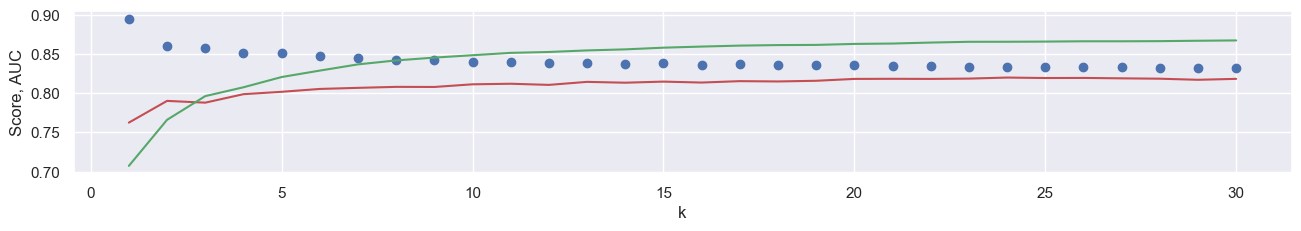

In [446]:
#Compute optimal k

clusters = np.arange(30)+1
train_scores = []
test_scores = []
aucs = []
for k in clusters:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    adult_knn = knn.fit(X_knn_train,y_knn_train.ravel())
    adult_knn_probs = adult_knn.predict_proba(X_knn_test)
    train_scores.append(adult_knn.score(X_knn_train,y_knn_train.ravel()))
    test_scores.append(adult_knn.score(X_knn_test,y_knn_test.ravel()))
    aucs.append(metrics.roc_auc_score(y_true=y_knn_test,y_score=adult_knn_probs[:,1]))
plt.plot(clusters,train_scores,'bo')
plt.plot(clusters,test_scores,'r')
plt.plot(clusters,aucs,'g')
plt.xlabel('k')
plt.ylabel('Score, AUC')


print(f'Highest Test Accuracy: {round(max(test_scores)*100,2)} with k={test_scores.index(max(test_scores))+1}.')
print(f'Highest AUC: {round(max(aucs)*100,2)} with k={aucs.index(max(aucs))+1}.')


(15060,)
              precision    recall  f1-score   support

      <=$50k       0.86      0.91      0.88     11360
       >$50k       0.66      0.53      0.59      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.72      0.74     15060
weighted avg       0.81      0.82      0.81     15060



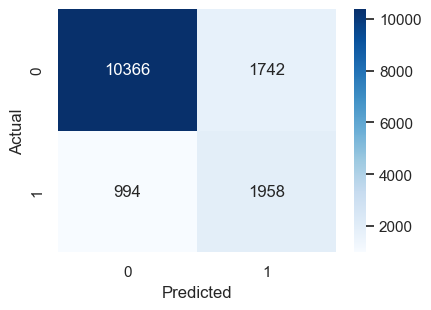

In [424]:
#k chosen from tuning by highest AUC - Likely higher k may maximized but returns are minimal and moving away from max score
k = 30

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
adult_knn = knn.fit(X_knn_train,y_knn_train.ravel())
adult_knn_hat = adult_knn.predict(X_knn_test)
adult_knn_probs = adult_knn.predict_proba(X_knn_test)
adult_knn.score(X_knn_train,y_knn_train.ravel())
acc_knn = adult_knn.score(X_knn_test,y_knn_test.ravel())

print(adult_knn_hat.shape)
confuse_knn =  sklearn.metrics.confusion_matrix(adult_knn_hat,y_knn_test.ravel())
report_knn = sklearn.metrics.classification_report(y_knn_test.ravel(),adult_knn_hat,target_names=['<=$50k','>$50k'])
sns.set(rc={"figure.figsize":(4, 3)})
ax = sns.heatmap(confuse_knn, annot=True, cmap='Blues',fmt='d',)
ax.set(xlabel="Predicted",ylabel='Actual')
print(report_knn)

#compute false positive and true positive rates for ROC plot
knn_fpr,knn_tpr, knn_thresholds= metrics.roc_curve(y_true=y_knn_test,y_score=adult_knn_probs[:,1])
auc_knn = metrics.roc_auc_score(y_true=y_knn_test,y_score=adult_knn_probs[:,1])


## Results

### ROC Curves

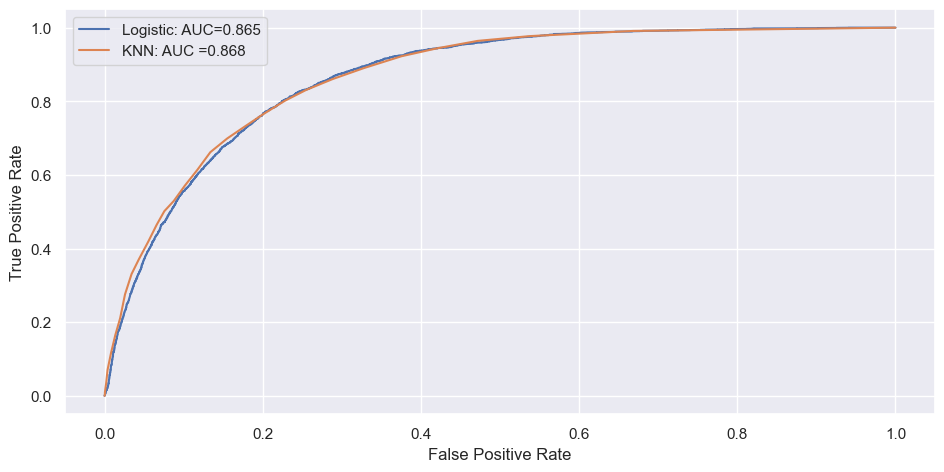

In [425]:
plt.figure(figsize=(10,5))
plt.plot(log_fpr, log_tpr,label='Logistic: AUC=%.3f' % (auc_log))
plt.plot(knn_fpr, knn_tpr,label='KNN: AUC =%.3f' % (auc_knn))
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [426]:
tpr_knn = confuse_knn[1][1] / (confuse_knn[1][0]+confuse_knn[1][1])
tnr_knn = confuse_knn[0][0] / (confuse_knn[0][0]+confuse_knn[1][0])
#print(tpr_knn,tnr_knn)

tpr_log = confuse[1][1] / (confuse[1][0]+confuse[1][1])
tnr_log = confuse[0][0] / (confuse[0][0]+confuse[1][0])
#print(tpr_log,tnr_log)

### Metrics 

Both the logistic regression and KNN performed very similarly, KNN producing a 0.3% higher accuracy score and AUC. 

Since there are significantly fewer observations with >$50k salary in the data set, it is also worth checking if either model performs better at correctly catagorizing positives. While there is not a huge difference, KNN again outperforms the logistic regression by 1.4% when just looking at the true postive rate. This can be seen int he slight separation in the ROC curves.

In [430]:
temp = np.array([[acc_log,1-acc_log,auc_log,tpr_log,tnr_log],[acc_knn,1-acc_knn,auc_knn,tpr_knn,tnr_knn]])

display = pd.DataFrame(temp,columns=['Accuracy','Error','AUC','Correct >$50k Classification','Correct <=$50k Classification'],index=['Logistic Regression','KNN'])
display.style

,Accuracy,Error,AUC,Correct >$50k Classification,Correct <=$50k Classification
Logistic Regression,0.815604,0.184396,0.865382,0.653885,0.908627
KNN,0.818327,0.181673,0.868378,0.663279,0.912500


In [431]:
print('Accuracy: KNN / Logistic',acc_knn/acc_log * 100)
print('AUC: KNN / Logistic',auc_knn/auc_log * 100)
print('True Positive: KNN / Logistic',tpr_knn/tpr_log * 100)
print('True Negative: KNN / Logistic',tnr_knn/tnr_log * 100)

Accuracy: KNN / Logistic 100.33379467556784
AUC: KNN / Logistic 100.34626650410425
True Positive: KNN / Logistic 101.4367220418762
True Negative: KNN / Logistic 100.42627397791124


## Conclusions

The data includes the following results from the original authors:

|    Algorithm            |   Error |
| :------------------     |   :-----: |
| 1  C4.5                 |   15.54 |
| 2  C4.5-auto            |   14.46 |
| 3  C4.5 rules           |   14.94 |
| 4  Voted ID3 (0.6)      |   15.64 |
| 5  Voted ID3 (0.8)      |   16.47 |
| 6  T2                   |   16.84 |
| 7  1R                   |   19.54 |
| 8  NBTree               |   14.10 |
| 9  CN2                  |   16.00 |
| 10 HOODG                |   14.82 |
| 11 FSS Naive Bayes      |   14.05 |
| 12 IDTM (Decision table)|   14.46 |
| 13 Naive-Bayes          |   16.12 |
| 14 Nearest-neighbor (1) |   21.42 |
| 15 Nearest-neighbor (3) |   20.35 |
| 16 OC1                  |   15.04 |

* Error from logistic regression - 18.44
* Error from KNN(k=30) - 18.17

The results of this analysis compare favorably to low-k nearest neighbor analyses performed by the original authors, but are quite a bit worse than many of the decision tree algorithms. 

The KNN model slightly outperforms the logistic regression but is significantly slower to run.